# Final Exam - Antoine CHABERT - 273809

In [1]:
# Data pocessing
import pandas as pd
import numpy as np
from dateutil.parser import parse

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error


# Interactive viz
import folium
import matplotlib.pyplot as plt
import seaborn as sns


# Utils
import json
import collections
import requests as rq
from bs4 import BeautifulSoup as bfs
import math
import scipy.stats as stats
from geopy.geocoders import GeoNames, Nominatim, GoogleV3
%matplotlib inline

First of all we import respective JSON file in a pandas dataframe:

In [2]:
epfl = pd.read_json('./epfl_en.json')
epfl.shape

(3208, 29)

In [3]:
ethz = pd.read_json('./eth_en.json')
ethz.shape

(2101, 29)

Then we make sample like asked:

In [4]:
def make_sample(df):
    return df[df['id'] % 10 == 9].copy()

In [5]:
epfl_sample = make_sample(epfl)
epfl_sample.shape

(123, 29)

In [6]:
ethz_sample = make_sample(ethz)
ethz_sample.shape

(74, 29)

We can see that the result is very small regarding original dataframes, we have less than 10% of the global dataframe.

## 1. Data Wrangling

First, check if IDs are really unique:

In [7]:
epfl['id'].is_unique

True

In [8]:
ethz['id'].is_unique

True

Set ID in index for better performances and manipulations:

In [9]:
epfl.set_index('id', inplace=True)

In [10]:
epfl_sample.set_index('id', inplace=True)

In [11]:
ethz.set_index('id', inplace=True)

In [12]:
ethz_sample.set_index('id', inplace=True)

Check null values:

In [13]:
epfl.isnull().sum()

contributors                 3208
coordinates                  3207
created_at                      0
entities                        0
extended_entities            2698
favorite_count                  0
favorited                       0
geo                          3207
id_str                          0
in_reply_to_screen_name      2919
in_reply_to_status_id        2976
in_reply_to_status_id_str    2976
in_reply_to_user_id          2919
in_reply_to_user_id_str      2919
is_quote_status                 0
lang                            0
place                        3167
possibly_sensitive            880
quoted_status                3191
quoted_status_id             3176
quoted_status_id_str         3176
retweet_count                   0
retweeted                       0
retweeted_status             2441
source                          0
text                            0
truncated                       0
user                            0
dtype: int64

In [14]:
epfl_sample.isnull().sum()

contributors                 123
coordinates                  123
created_at                     0
entities                       0
extended_entities            103
favorite_count                 0
favorited                      0
geo                          123
id_str                         0
in_reply_to_screen_name      114
in_reply_to_status_id        114
in_reply_to_status_id_str    114
in_reply_to_user_id          114
in_reply_to_user_id_str      114
is_quote_status                0
lang                           0
place                        120
possibly_sensitive            31
quoted_status                123
quoted_status_id             123
quoted_status_id_str         123
retweet_count                  0
retweeted                      0
retweeted_status             100
source                         0
text                           0
truncated                      0
user                           0
dtype: int64

In [15]:
ethz.isnull().sum()

contributors                 2101
coordinates                  2101
created_at                      0
entities                        0
extended_entities            1532
favorite_count                  0
favorited                       0
geo                          2101
id_str                          0
in_reply_to_screen_name      2057
in_reply_to_status_id        2083
in_reply_to_status_id_str    2083
in_reply_to_user_id          2057
in_reply_to_user_id_str      2057
is_quote_status                 0
lang                            0
place                        2101
possibly_sensitive            521
quoted_status                2021
quoted_status_id             2014
quoted_status_id_str         2014
retweet_count                   0
retweeted                       0
retweeted_status             1656
source                          0
text                            0
truncated                       0
user                            0
dtype: int64

In [16]:
ethz_sample.isnull().sum()

contributors                 74
coordinates                  74
created_at                    0
entities                      0
extended_entities            53
favorite_count                0
favorited                     0
geo                          74
id_str                        0
in_reply_to_screen_name      73
in_reply_to_status_id        74
in_reply_to_status_id_str    74
in_reply_to_user_id          73
in_reply_to_user_id_str      73
is_quote_status               0
lang                          0
place                        74
possibly_sensitive           22
quoted_status                73
quoted_status_id             73
quoted_status_id_str         73
retweet_count                 0
retweeted                     0
retweeted_status             61
source                        0
text                          0
truncated                     0
user                          0
dtype: int64

Like we can see, samples are very representating of 10% of the full dataset concerning null values.

Check types:

In [17]:
epfl.dtypes

contributors                        float64
coordinates                          object
created_at                   datetime64[ns]
entities                             object
extended_entities                    object
favorite_count                        int64
favorited                              bool
geo                                  object
id_str                                int64
in_reply_to_screen_name              object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
is_quote_status                        bool
lang                                 object
place                                object
possibly_sensitive                  float64
quoted_status                        object
quoted_status_id                    float64
quoted_status_id_str                float64
retweet_count                         int64
retweeted                       

In [18]:
ethz.dtypes

contributors                        float64
coordinates                         float64
created_at                   datetime64[ns]
entities                             object
extended_entities                    object
favorite_count                        int64
favorited                              bool
geo                                 float64
id_str                                int64
in_reply_to_screen_name              object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
is_quote_status                        bool
lang                                 object
place                               float64
possibly_sensitive                  float64
quoted_status                        object
quoted_status_id                    float64
quoted_status_id_str                float64
retweet_count                         int64
retweeted                       

Add user id in data:

In [19]:
epfl['user_id'] = epfl['user'].apply(lambda x: x['id'])
epfl_sample['user_id'] = epfl_sample['user'].apply(lambda x: x['id'])
ethz['user_id'] = ethz['user'].apply(lambda x: x['id'])
ethz_sample['user_id'] = ethz_sample['user'].apply(lambda x: x['id'])

In [20]:
epfl['user_id'].value_counts()

104604540    3208
Name: user_id, dtype: int64

In [21]:
ethz['user_id'].value_counts()

204279080    2101
Name: user_id, dtype: int64

After checking, we see that there is only one user account by dataset (epfl => @EPFL_en / ethz => @ETH_en).

Extract year, month, day and hour for every rows:

In [51]:
epfl['created_at_year'] = epfl['created_at'].apply(lambda x: x.year)
epfl['created_at_month'] = epfl['created_at'].apply(lambda x: x.month)
epfl['created_at_day'] = epfl['created_at'].apply(lambda x: x.day)
epfl['created_at_hour'] = epfl['created_at'].apply(lambda x: x.hour)

ethz['created_at_year'] = ethz['created_at'].apply(lambda x: x.year)
ethz['created_at_month'] = ethz['created_at'].apply(lambda x: x.month)
ethz['created_at_day'] = ethz['created_at'].apply(lambda x: x.day)
ethz['created_at_hour'] = ethz['created_at'].apply(lambda x: x.hour)

Extract hashtags by rows:

In [59]:
epfl['hashtags'] = epfl['entities'].apply(lambda x: [hashtag['text'] for hashtag in x['hashtags']])
ethz['hashtags'] = ethz['entities'].apply(lambda x: [hashtag['text'] for hashtag in x['hashtags']])

## 2. Descriptive statistics and plots

### Number of retweet and favorite

In [31]:
epfl_grouped_by_user = epfl[['user_id', 'favorited', 'favorite_count', 'retweeted', 'retweet_count', 'created_at']].groupby('user_id')
epfl_grouped_by_user.describe()

favorite_count  retweet_count
user_id                                       
104604540 count     3208.000000    3208.000000
          mean         1.192643       6.120324
          std          2.814000     112.535270
          min          0.000000       0.000000
          25%          0.000000       0.000000
          50%          0.000000       2.000000
          75%          1.000000       4.000000
          max         31.000000    6095.000000

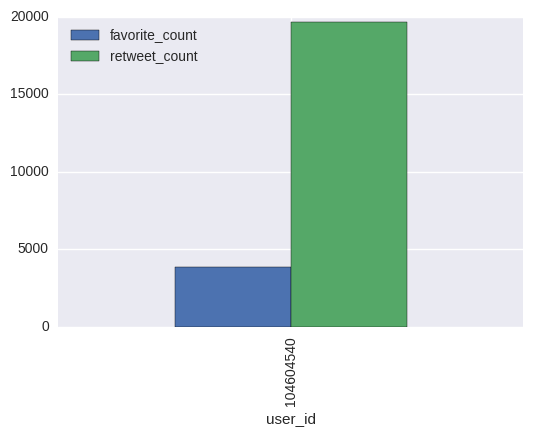

In [42]:
epfl_grouped_by_user[['favorite_count', 'retweet_count']].sum().plot(kind='bar')

In [32]:
ethz_grouped_by_user = ethz[['user_id', 'favorited', 'favorite_count', 'retweeted', 'retweet_count', 'created_at']].groupby('user_id')
ethz_grouped_by_user.describe()

favorite_count  retweet_count
user_id                                       
204279080 count     2101.000000    2101.000000
          mean         1.901000       3.970490
          std          3.298875      20.808402
          min          0.000000       0.000000
          25%          0.000000       1.000000
          50%          1.000000       2.000000
          75%          2.000000       4.000000
          max         33.000000     746.000000

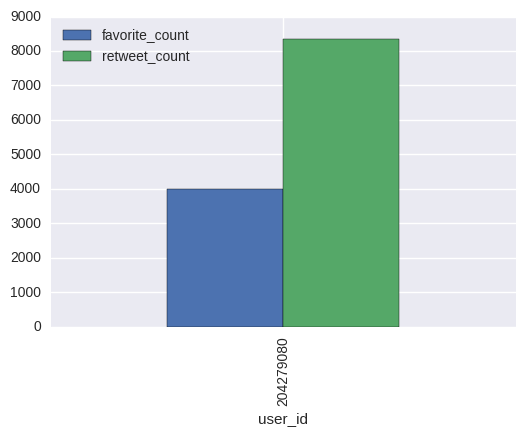

In [43]:
ethz_grouped_by_user[['favorite_count', 'retweet_count']].sum().plot(kind='bar')

### Evolution of number of retweet and favorite by year

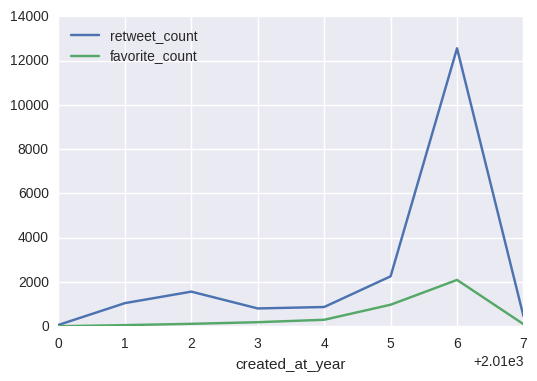

In [39]:
epfl[['created_at_year', 'retweet_count', 'favorite_count']].groupby('created_at_year').sum().plot(kind='line')

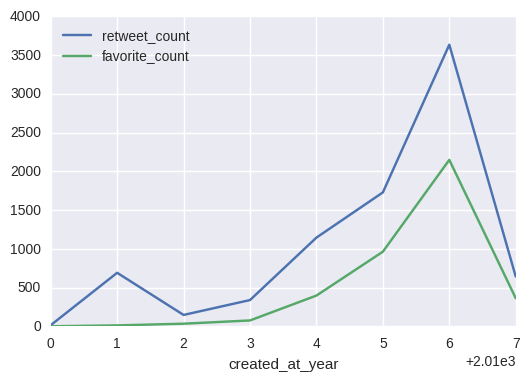

In [44]:
ethz[['created_at_year', 'retweet_count', 'favorite_count']].groupby('created_at_year').sum().plot(kind='line')

### Evolution of number of retweet and favorite by month

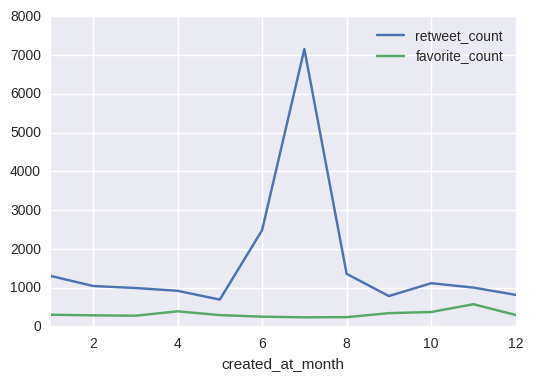

In [46]:
epfl[['created_at_month', 'retweet_count', 'favorite_count']].groupby('created_at_month').sum().plot(kind='line')

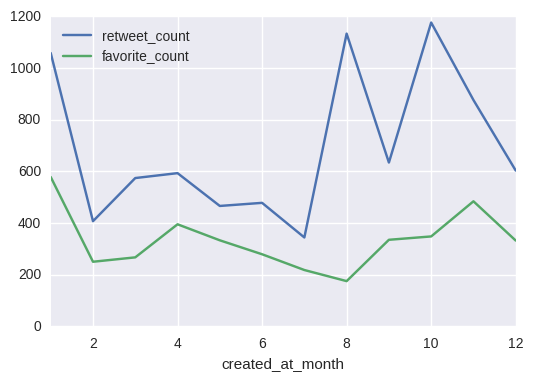

In [47]:
ethz[['created_at_month', 'retweet_count', 'favorite_count']].groupby('created_at_month').sum().plot(kind='line')

### Evolution of number of retweet and favorite by hour

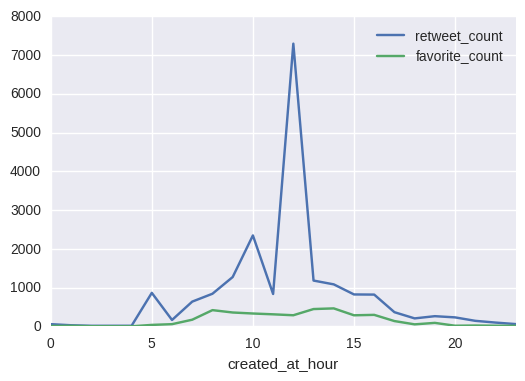

In [52]:
epfl[['created_at_hour', 'retweet_count', 'favorite_count']].groupby('created_at_hour').sum().plot(kind='line')

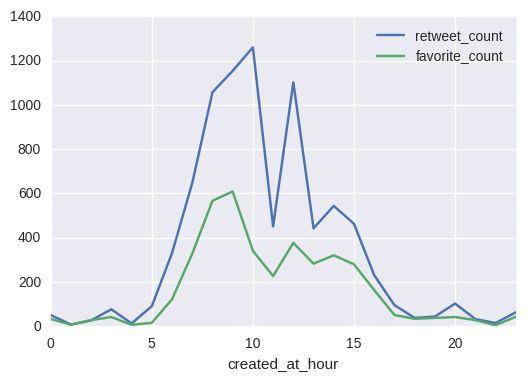

In [53]:
ethz[['created_at_hour', 'retweet_count', 'favorite_count']].groupby('created_at_hour').sum().plot(kind='line')

### Hashtags

In [61]:
#epfl[['hashtags', 'retweet_count', 'favorite_count']].groupby('hashtags').sum().plot(kind='line')

## 3.